## PROBLEM STATEMENT 
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


### Principal Component Analysis (PCA) is one of the most commonly used unsupervised machine learning algorithms across a variety of applications: exploratory data analysis, dimensionality reduction,information compression, data de-noising, and plenty more.

In [3]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
wine = pd.read_csv("E:\deeksha\python\data\wine.csv")

In [9]:
# Performing EDA on dataset

In [4]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
wine.shape, wine.size

((178, 14), 2492)

In [7]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
wine.duplicated().sum()

0

In [11]:
wine['Type'].unique()

array([1, 2, 3], dtype=int64)

In [13]:
# Checking Correlation among features

In [12]:
wine.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [14]:
correlation_matrix = wine.corr()

### Plotting Heat-Map

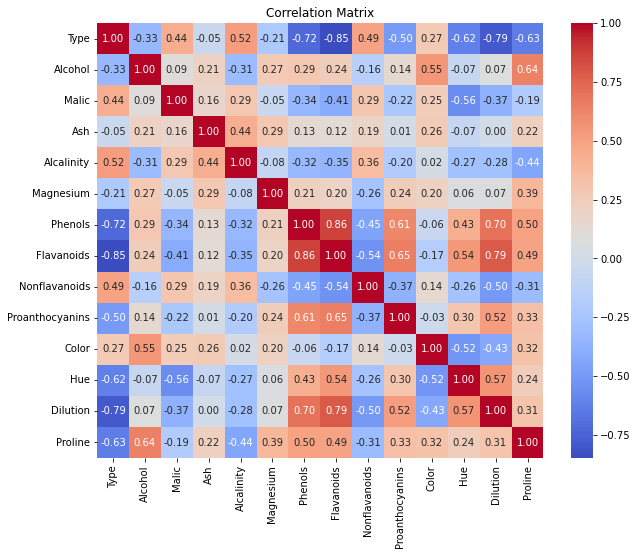

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

import warnings
warnings.filterwarnings("ignore")

### Performing Clustering (heirarchial and k mean)

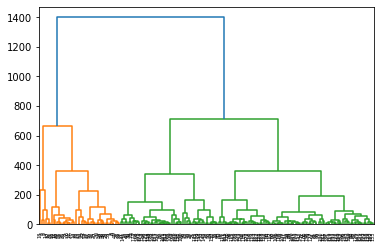

In [16]:
# create dendrogram
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
dendrogram = sch.dendrogram(sch.linkage(wine, method='complete'))

In [17]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')


In [18]:
hc.fit(wine)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [19]:
# save clusters for chart
y_hc = hc.fit_predict(wine)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters

In [20]:
y_hc

array([1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int64)

In [21]:
wine['h_clusterid'] = y_hc

In [22]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [23]:
wine1=wine.sort_values("h_clusterid")
wine1.iloc[:,[0,-1]]

,Type,h_clusterid
177,3,0
59,2,0
93,2,0
94,2,0
96,2,0
...,...,...
5,1,3
3,1,3
10,1,3
18,1,3


## using K-Mean Clustering Method

In [24]:
## using k-mean clustering 
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(wine)

In [26]:
predict

array([3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

## using elbow curv for plotting

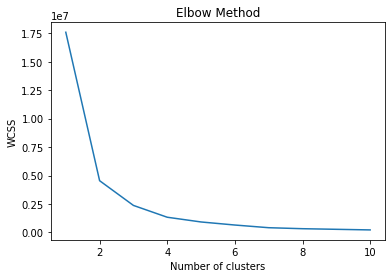

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#Building Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine)

KMeans(n_clusters=3, random_state=42)

In [29]:
clusters_new.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [30]:
#Assign clusters to the data set
wine['clusterid_new'] = clusters_new.labels_

In [31]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2


In [32]:
wine.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.275362,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884,0.000000
1,1,1.021277,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936,1.340426
2,2,2.258065,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710,1.548387


In [33]:
wine[wine['clusterid_new']==2]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_new
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2
19,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,2,2
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,2,2
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,2,2
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,2,2
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,2


In [34]:
## using silhouette score

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [36]:
silhouette_score_average = silhouette_score(wine, predict)

In [37]:
silhouette_score_average

0.5620113546040538

## using DB-SCAN CLUSTERING

### Building A Model

In [38]:
array=wine.values


In [39]:
array

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.065e+03, 1.000e+00,
        1.000e+00],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+03, 1.000e+00,
        1.000e+00],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.185e+03, 1.000e+00,
        1.000e+00],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 8.350e+02, 2.000e+00,
        2.000e+00],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 8.400e+02, 2.000e+00,
        2.000e+00],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 5.600e+02, 0.000e+00,
        0.000e+00]])

In [40]:
X = array

In [41]:
X

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.065e+03, 1.000e+00,
        1.000e+00],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+03, 1.000e+00,
        1.000e+00],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.185e+03, 1.000e+00,
        1.000e+00],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 8.350e+02, 2.000e+00,
        2.000e+00],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 8.400e+02, 2.000e+00,
        2.000e+00],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 5.600e+02, 0.000e+00,
        0.000e+00]])

In [42]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [43]:
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [44]:
DBSCAN(eps=3, min_samples=2)

DBSCAN(eps=3, min_samples=2)

## Using PCA

In [45]:
# Normalizing the numerical data

In [46]:
std = StandardScaler()
uni_normal=std.fit_transform(wine)
uni_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  1.01300893,
         0.11366654,  0.04588906],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.96524152,
         0.11366654,  0.04588906],
       [-1.21394365,  0.19687903,  0.02123125, ...,  1.39514818,
         0.11366654,  0.04588906],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ...,  0.28057537,
         1.17854251,  1.21278235],
       [ 1.37386437,  0.20923168,  0.22769377, ...,  0.29649784,
         1.17854251,  1.21278235],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -0.59516041,
        -0.95120944, -1.12100423]])

In [47]:
pca2=PCA(n_components=2)
pca_components=pd.DataFrame(pca2.fit_transform(uni_normal),columns=['a','b'])
pca_components.head(7)

,a,b
0,3.560292,-0.816843
1,2.499811,0.460624
2,2.801911,-0.474874
3,4.395529,-2.591433
4,1.706422,-1.338308
5,3.751447,-2.229977
6,2.788443,-0.690243


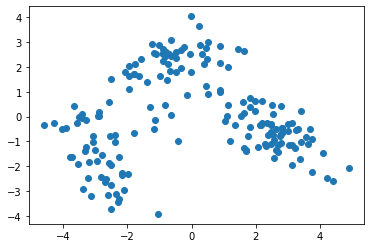

In [48]:
plt.scatter(pca_components.a,pca_components.b)

In [49]:
pca3=PCA(n_components=3)
pca3.fit(wine)

PCA(n_components=3)

In [50]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine)

In [51]:
pca_values

array([[ 3.18563564e+02,  2.14773180e+01,  3.18026478e+00,
        -1.74714962e-01,  9.99520546e-01,  7.53686187e-01],
       [ 3.03098058e+02, -5.37459382e+00,  6.81921121e+00,
        -9.87990005e-01, -3.74788515e-01,  3.75931091e-01],
       [ 4.38061296e+02, -6.55121322e+00, -1.05441808e+00,
         1.04372833e+00,  6.13660254e-01,  6.73996655e-01],
       ...,
       [ 8.84592764e+01,  1.88009127e+01, -2.45004595e+00,
        -4.94124464e+00, -1.05377116e+00,  1.81055796e-01],
       [ 9.34574270e+01,  1.86952294e+01, -1.98377243e+00,
        -3.86421857e+00, -5.98111104e-01, -1.04354215e+00],
       [-1.86946877e+02, -2.27623797e-01, -5.71949111e+00,
        -3.23191628e+00,  6.49947394e-01,  1.39576602e+00]])

In [52]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.98075892e-01, 1.73645450e-03, 9.59391561e-05, 5.17438305e-05,
       1.33639061e-05, 9.46931112e-06])

In [53]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  ])

In [54]:
pca.components_

array([[-1.55933602e-03,  1.65925801e-03, -6.81015496e-04,
         1.94904923e-04, -4.67129296e-03,  1.78680009e-02,
         9.89828138e-04,  1.56728514e-03, -1.23086360e-04,
         6.00607694e-04,  2.32713004e-03,  1.71379940e-04,
         7.04932019e-04,  9.99819422e-01,  1.85847014e-03,
         1.06944294e-03],
       [ 2.79530115e-03,  1.20298836e-03,  2.16882003e-03,
         4.59337649e-03,  2.64563520e-02,  9.99175281e-01,
         8.66649485e-04, -8.28982316e-05, -1.35170565e-03,
         4.99801216e-03,  1.51516149e-02, -7.68196136e-04,
        -3.51211649e-03, -1.78031060e-02,  1.18359894e-02,
         1.36621147e-02],
       [-1.01374412e-01, -1.83839648e-02, -1.24810540e-01,
        -5.12644637e-02, -9.27133818e-01,  3.03534545e-02,
         4.30346765e-02,  9.09635403e-02, -1.37639829e-02,
         2.64065883e-02, -3.04632951e-01,  2.71264278e-02,
         7.47809696e-02, -4.59682821e-03, -3.77639939e-03,
        -2.24349190e-02],
       [-1.48359691e-01, -1.34648315e

In [55]:
pca_values[:,0:1]

array([[ 318.56356432],
       [ 303.09805758],
       [ 438.06129635],
       [ 733.24298267],
       [ -11.56675548],
       [ 703.23414051],
       [ 542.97137522],
       [ 548.40163649],
       [ 298.03751832],
       [ 298.05020864],
       [ 763.0824499 ],
       [ 532.94305727],
       [ 572.83409935],
       [ 402.92564474],
       [ 800.05600171],
       [ 563.24530195],
       [ 533.37948001],
       [ 383.31794773],
       [ 933.12052783],
       [  98.4074638 ],
       [  33.59810873],
       [  23.15098762],
       [ 288.09372091],
       [ 267.98227358],
       [  98.02417229],
       [  83.50308306],
       [ 447.92572455],
       [ 537.91897701],
       [ 168.21450798],
       [ 288.00893779],
       [ 538.02626406],
       [ 768.09565923],
       [ 243.15345822],
       [ 488.60126753],
       [ 348.23148674],
       [ 173.08398027],
       [ 133.2905869 ],
       [ 358.01900384],
       [ 273.04517495],
       [  13.64758712],
       [  48.43410431],
       [ 287.884

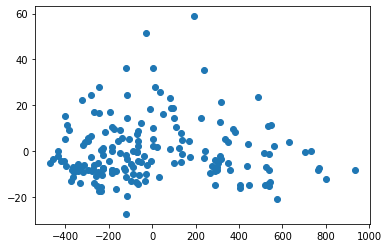

In [56]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [57]:
finalDf = pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2'])

In [58]:
finalDf['wine'] = wine['Type']

In [59]:
fdf=pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

In [60]:
fdf

,pc1,pc2,Type
0,318.563564,21.477318,1
1,303.098058,-5.374594,1
2,438.061296,-6.551213,1
3,733.242983,0.191900,1
4,-11.566755,18.511876,1
...,...,...,...
173,-6.978674,-4.509609,3
174,3.133106,2.365208,3
175,88.459276,18.800913,3
176,93.457427,18.695229,3


In [61]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

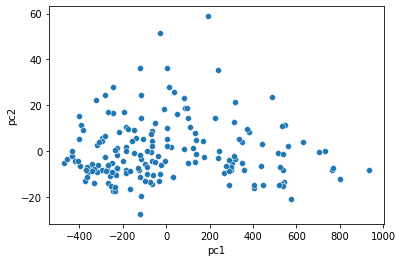

In [62]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2')